# II. Programming and critical analysis

### 1.

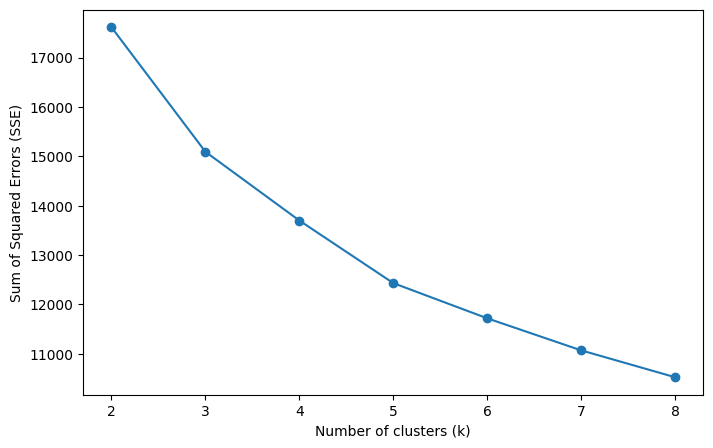

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('accounts.csv')

df = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan']]
df = df.drop_duplicates().dropna()


df = pd.get_dummies(df, drop_first=True)

scaler = MinMaxScaler()
df_minmax_normalized = scaler.fit_transform(df)

sse = []
k_values = range(2, 9)
for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(df_minmax_normalized)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()



### 2.

In [5]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
df_standard_normalized = scaler.fit_transform(df)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_standard_normalized)

explained_variance = pca.explained_variance_ratio_.sum()
explained_variance


0.22754999696891248